# Motion Capture Data Analysis - NM19

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa #Sound analysis

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!{sys.executable} -m pip install chart_studio  #Librosa plots

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!{sys.executable} -m pip install numba

    100% |████████████████████████████████| 2.0MB 2.3MB/s ta 0:00:01
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import numba

In [50]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio

%load_ext rpy2.ipython

#r packages
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
stats = importr('stats')
base = importr('base')

from scipy import stats
import seaborn
from IPython.display import display, Markdown


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Reading Motion Capture Data into Pandas Dataframes

In [61]:
#Reading OptiTrack generated csv files (one for each group of participants) from local drive

nm19raw = {}

path = r'/Users/vesanche/Desktop/IMV UiO/NM/2019 NM/MoCap Motive/oslo_nm' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.csv")))

i=1

for filename in nm_files:
    nm19raw[i] = pd.read_csv(filename, delimiter=',', encoding='utf-8', skiprows=6, na_filter=False)
    i = i+1




In [63]:
#Example: Group1. Last participant data (last three columns) in each group corresponds to marker on reference tripod
nm19raw[1]

,Frame,Time (Seconds),X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,...,Z.5,X.6,Y.6,Z.6,X.7,Y.7,Z.7,X.8,Y.8,Z.8
0,0,0.000000,-1.373710,1.722704,-0.328430,-0.269821,1.644331,-0.465869,0.968400,1.710918,...,0.881324,0.950961,1.660661,0.909216,2.071866,1.902305,0.988932,0.265844,1.691133,0.209926
1,1,0.008333,-1.373715,1.722712,-0.328428,-0.269777,1.644327,-0.465833,0.968426,1.710911,...,0.881393,0.950928,1.660663,0.909256,2.071880,1.902311,0.988944,0.265839,1.691126,0.209921
2,2,0.016667,-1.373792,1.722741,-0.328371,-0.269719,1.644325,-0.465809,0.968466,1.710908,...,0.881460,0.950916,1.660689,0.909314,2.071897,1.902303,0.988990,0.265844,1.691125,0.209926
3,3,0.025000,-1.373726,1.722708,-0.328429,-0.269690,1.644330,-0.465788,0.968483,1.710899,...,0.881523,0.950883,1.660698,0.909366,2.071929,1.902299,0.988976,0.265844,1.691126,0.209925
4,4,0.033333,-1.373749,1.722706,-0.328437,-0.269656,1.644321,-0.465747,0.968498,1.710911,...,0.881586,0.950861,1.660708,0.909383,2.071948,1.902300,0.988982,0.265846,1.691128,0.209920
5,5,0.041667,-1.373778,1.722703,-0.328450,-0.269634,1.644327,-0.465718,0.968484,1.710893,...,0.881626,0.950850,1.660724,0.909431,2.071950,1.902277,0.989028,0.265833,1.691128,0.209923
6,6,0.050000,-1.373792,1.722712,-0.328460,-0.269551,1.644315,-0.465694,0.968493,1.710908,...,0.881681,0.950834,1.660739,0.909459,2.071967,1.902301,0.989003,0.265835,1.691122,0.209926
7,7,0.058333,-1.373796,1.722714,-0.328483,-0.269539,1.644309,-0.465662,0.968470,1.710904,...,0.881721,0.950825,1.660750,0.909495,2.071963,1.902262,0.989006,0.265842,1.691125,0.209922
8,8,0.066667,-1.373825,1.722710,-0.328492,-0.269516,1.644313,-0.465633,0.968465,1.710910,...,0.881776,0.950834,1.660769,0.909517,2.071984,1.902294,0.989016,0.265835,1.691131,0.209918
9,9,0.075000,-1.373817,1.722700,-0.328504,-0.269470,1.644315,-0.465591,0.968471,1.710917,...,0.881823,0.950842,1.660783,0.909532,2.071967,1.902273,0.989055,0.265840,1.691127,0.209924


## Extracting individuals from groups and nesting in dictionaries

In [65]:
nm19[1][4] #data from group 1, participant 4

,Time (seconds),X,Y,Z
0,0.000000,2.124473,1.779995,-0.291815
1,0.008333,2.124408,1.779953,-0.291696
2,0.016667,2.124357,1.779962,-0.291517
3,0.025000,2.124327,1.779990,-0.291416
4,0.033333,2.124319,1.779993,-0.291318
5,0.041667,2.124223,1.779880,-0.291132
6,0.050000,2.124233,1.779881,-0.291013
7,0.058333,2.124184,1.779896,-0.290851
8,0.066667,2.124173,1.779895,-0.290750
9,0.075000,2.124153,1.779873,-0.290641


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [19]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (seconds)'][1:]
    
    return displacement


In [66]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm19[groups]) + 1):
        displacements[groups][i] = displacement(nm19[groups][i])
        displacements[groups][i]['timestep (seconds)'] = displacements[groups][i]['Time (seconds)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (seconds)'], axis=1)
        

In [67]:
displacements[10][2] #displacement for group 10, participant 2 with sound artifact

,X,Y,Z,timestep (seconds)
Time (seconds),,,,
0.008333,6.000000e-06,6.000000e-06,4.000000e-06,0.008333
0.016667,8.000000e-06,-1.300000e-05,-1.700000e-05,0.008334
0.025000,1.800000e-05,0.000000e+00,-1.800000e-05,0.008333
0.033333,2.900000e-05,-1.000000e-06,-7.000000e-06,0.008333
0.041667,3.600000e-05,-7.000000e-06,-1.000000e-05,0.008334
0.050000,1.500000e-05,-3.000000e-06,-1.000000e-06,0.008333
0.058333,1.000000e-05,-7.000000e-06,3.000000e-06,0.008333
0.066667,2.000000e-06,1.000000e-05,-2.000000e-06,0.008334
0.075000,2.200000e-05,-8.000000e-06,3.000000e-06,0.008333


### Removing sound-displacement artifact
Removing displacement measured from the markers located on camera tripods from participants' data

In [68]:
displacements_clean = {} 

for groups in range(1,num_groups+1):
  displacements_clean[groups] = {} #creating empty dictionary for each group

  for i in range(1,len(nm19[groups])):
    displacements_clean[groups][i] = displacements[groups][i].sub(displacements[groups][len(nm19[groups])], axis=0) #substracting sound-movement artifact from data from the stand (last column)
    displacements_clean[groups][i]['timestep (seconds)'] = displacements[groups][i]['timestep (seconds)']

In [69]:
displacements_clean[10][2] #artifact-less displacement for group 10, participant 2

,X,Y,Z,timestep (seconds)
Time (seconds),,,,
0.008333,5.000000e-06,1.600000e-05,0.000005,0.008333
0.016667,8.000000e-06,-2.800000e-05,-0.000015,0.008334
0.025000,1.300000e-05,4.000000e-06,-0.000031,0.008333
0.033333,3.300000e-05,-3.000000e-06,0.000009,0.008333
0.041667,3.600000e-05,2.000000e-06,-0.000012,0.008334
0.050000,1.700000e-05,-7.000000e-06,-0.000005,0.008333
0.058333,5.000000e-06,-1.100000e-05,0.000011,0.008333
0.066667,0.000000e+00,1.100000e-05,-0.000006,0.008334
0.075000,2.400000e-05,-6.000000e-06,-0.000003,0.008333


Text(0.5, 1.0, 'Displacement with and without sound artifact (participant 10_2 (winner))')

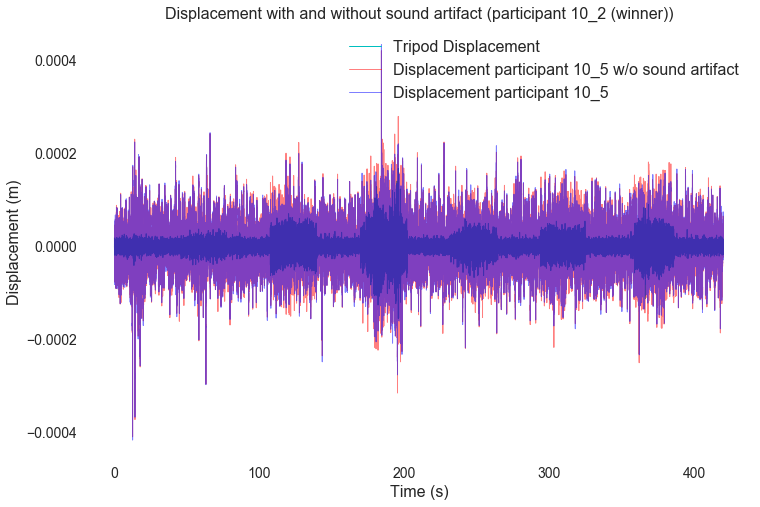

In [71]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[10][9]['X'], lw=1, label='Tripod Displacement', color='c')
ax5.plot(displacements_clean[10][5]['X'], lw=1, label='Displacement participant 10_5 w/o sound artifact', color='red', alpha=0.5)
ax5.plot(displacements[10][5]['X'], lw=1, label='Displacement participant 10_5', color='blue', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (m)', fontsize=16);
plt.title('Displacement with and without sound artifact (participant 10_2 (winner))', fontsize=16)

### Calculating norm of displacement

In [72]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [73]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm19[groups])):
        disp_norms[groups][i] = disp_norm(displacements_clean[groups][i])

In [27]:
disp_norms[10][2]

,Norm of Displacement
Time (seconds),
0.008333,0.000012
0.016667,0.000026
0.025000,0.000018
0.033333,0.000054
0.041667,0.000031
0.050000,0.000017
0.058333,0.000059
0.066667,0.000026
0.075000,0.000008


In [74]:
disp_norms_artifact = {}    

for groups in range(1,num_groups+1):
    disp_norms_artifact[groups] = {}
    
    for i in range(1,len(nm19[groups])):
        disp_norms_artifact[groups][i] = disp_norm(displacements[groups][i])

In [29]:
disp_norms_artifact[10][2]

,Norm of Displacement
Time (seconds),
0.008333,0.000009
0.016667,0.000021
0.025000,0.000008
0.033333,0.000043
0.041667,0.000024
0.050000,0.000022
0.058333,0.000056
0.066667,0.000015
0.075000,0.000014


### Distance travelled
Cummulative distance travelled

In [75]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
disp_norms_artif_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
    disp_norms_artif_group[group_id] = pd.concat(disp_norms_artifact[group_id],1)

In [76]:
disp_norms_group[10]

,1,2,3,4,5,6,7,8
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (seconds),,,,,,,,
0.008333,0.000049,0.000017,0.000083,0.000025,0.000050,0.000049,0.000163,0.000112
0.016667,0.000025,0.000033,0.000059,0.000019,0.000072,0.000036,0.000137,0.000148
0.025000,0.000026,0.000034,0.000087,0.000037,0.000057,0.000029,0.000141,0.000137
0.033333,0.000059,0.000034,0.000063,0.000029,0.000075,0.000017,0.000125,0.000115
0.041667,0.000032,0.000038,0.000057,0.000050,0.000093,0.000017,0.000091,0.000175
0.050000,0.000021,0.000019,0.000083,0.000036,0.000049,0.000014,0.000067,0.000124
0.058333,0.000013,0.000016,0.000034,0.000021,0.000099,0.000048,0.000066,0.000167
0.066667,0.000021,0.000013,0.000070,0.000030,0.000089,0.000008,0.000384,0.000141


Text(0.5, 1.0, 'Distance travelled for all participants, Group 10')

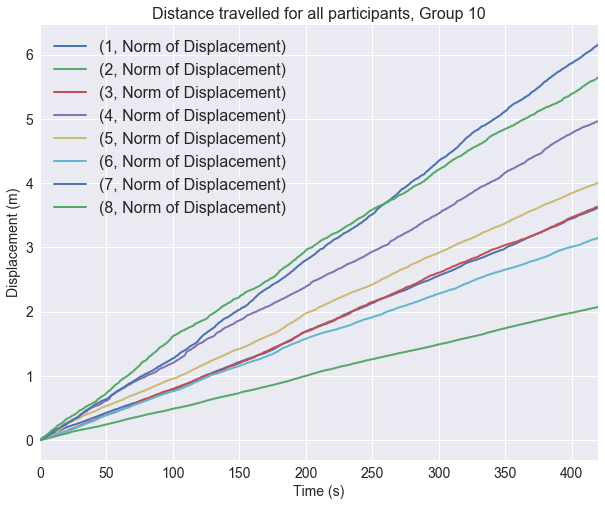

In [77]:
disp_norms_group[10].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (m)', fontsize=14);
plt.legend(loc='upper left', fontsize=16)
plt.title('Distance travelled for all participants, Group 10', fontsize=16)

### Plotting the planar displacement

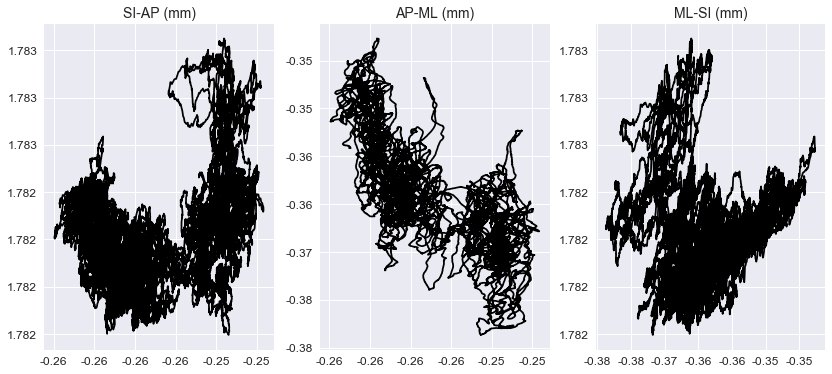

In [78]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm19[10][2]['X'], nm19[10][2]['Y'], color='k')
plt.title('SI-AP (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ylabel('Y Position (m)', fontsize=11)
#plt.xlabel('X Position (m)', fontsize=11)
ab = plt.subplot(1, 3, 2)
plt.plot(nm19[10][2]['X'], nm19[10][2]['Z'], color='k')
plt.title('AP-ML (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ylabel('X Position (m)', fontsize=11)
#plt.xlabel('Z Position (m)', fontsize=11)
ac = plt.subplot(1, 3, 3)
plt.plot(nm19[10][2]['Z'], nm19[10][2]['Y'], color='k')
plt.title('ML-SI (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.ylabel('Z Position (m)', fontsize=11)
#plt.xlabel('Y Position (m)', fontsize=11)
#fig.suptitle('Marker position Group 10, Participant 2 (winner)', fontsize=16)

fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [79]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (seconds)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [80]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (seconds)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [81]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (seconds)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [82]:

velx = {} #anterior-posterior (AP)
vely = {} #vertical (SI)
velz = {} #lateral (ML)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm19[groups])):
        velx[groups][i] = x_vel(displacements_clean[groups][i])
        vely[groups][i] = y_vel(displacements_clean[groups][i])
        velz[groups][i] = z_vel(displacements_clean[groups][i])

In [ ]:
velx[10][2] #velocity in the AP direction for participant 10_2

### Calculating norm of velocity (QoM)

In [83]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (seconds)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [85]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm19[groups])):
        velocities[groups][i] = velocity_norm(displacements_clean[groups][i])

In [86]:
velocities[10][2] #displaying velocity for group 10, participant 2

,Velocity
Time (seconds),
0.008333,0.002099
0.016667,0.003930
0.025000,0.004062
0.033333,0.004121
0.041667,0.004560
0.050000,0.002286
0.058333,0.001961
0.066667,0.001503
0.075000,0.002991


In [87]:
#Concatenating cleaned velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [ ]:
velsx_group[10]

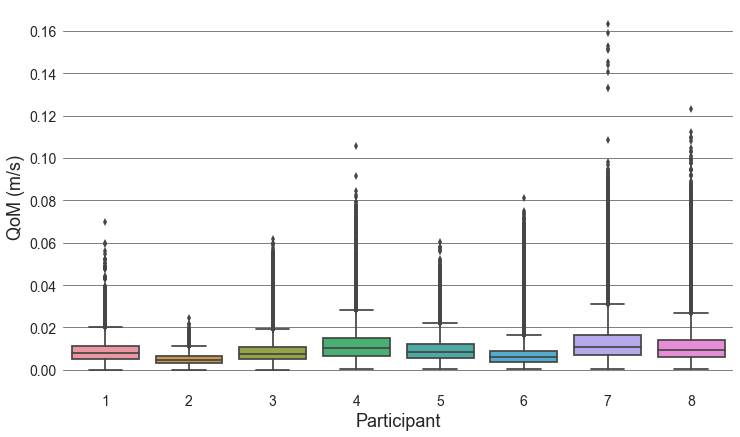

In [117]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[10], width=0.8)
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (m/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [90]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm19[groups])):
        velenv[groups][i] = vels_group[groups][i].rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(400,center=True,win_type='boxcar',min_periods=1).mean()

In [91]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [92]:
vel_envx_group[1]

,1,2,3,4,5,6,7,8
Time (seconds),,,,,,,,
0.008333,0.003391,0.002578,0.002849,0.004591,0.005954,0.004510,0.004518,0.004232
0.016667,0.003381,0.002575,0.002842,0.004576,0.005935,0.004490,0.004506,0.004217
0.025000,0.003376,0.002575,0.002836,0.004587,0.005955,0.004476,0.004496,0.004212
0.033333,0.003368,0.002571,0.002829,0.004572,0.005950,0.004472,0.004486,0.004194
0.041667,0.003381,0.002575,0.002826,0.004569,0.005949,0.004459,0.004479,0.004210
0.050000,0.003374,0.002593,0.002817,0.004552,0.005968,0.004443,0.004459,0.004194
0.058333,0.003362,0.002603,0.002813,0.004554,0.005973,0.004431,0.004439,0.004177
0.066667,0.003349,0.002605,0.002817,0.004542,0.005958,0.004411,0.004431,0.004160
0.075000,0.003343,0.002611,0.002811,0.004520,0.006018,0.004397,0.004424,0.004148


Text(0.5, 1.0, 'Velocity (participant 10_2 (winner))')

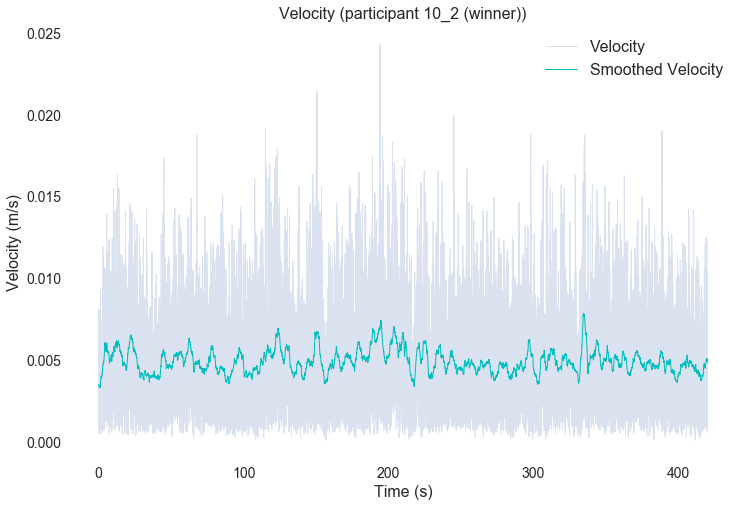

In [94]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[10][2], lw=1, label='Velocity', alpha=0.2)
ax.plot(velenv[10][2], lw=1, label='Smoothed Velocity', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (participant 10_2 (winner))', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants in Group 10')

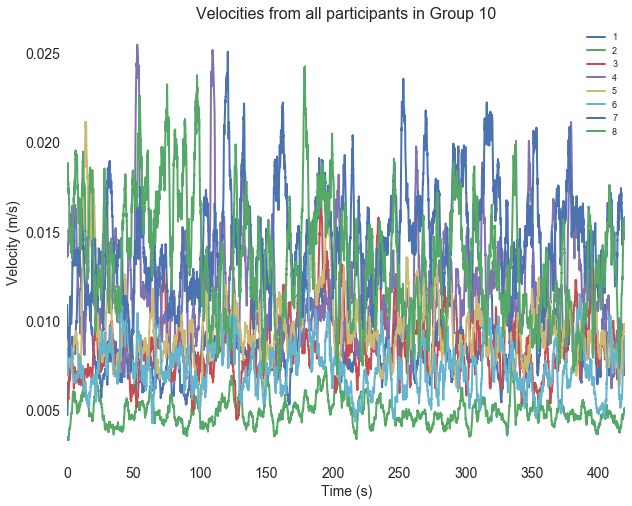

In [95]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[10].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants in Group 10', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [96]:
#Mean of cleaned velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm19[groups])):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Using the order of presentation of stimuli for each group to segment full trials into conditions (music-silence), and stimuli

In [99]:
#Stimuli presentation order
nm19songorder = pd.read_csv('/Users/vesanche/Desktop/IMV UiO/NM/2019 NM/MoCap Motive/nm19songorder.csv') #read the stimuli order file
nm19songorder.columns = ['Group','1', '2', '3','4', '5', '6']
nm19songorder.set_index('Group',inplace=True, drop=True) #Displaying song order table
nm19songorder

,1,2,3,4,5,6
Group,,,,,,
A,2,6,4,1,5,3
B,6,4,5,1,3,2
C,2,4,5,3,1,6
D,6,3,2,1,4,5
E,3,6,1,5,4,2
F,2,4,3,6,5,1
G,3,4,2,6,1,5
H,2,4,1,5,3,6
I,1,3,5,4,2,6


### Segmenting group data by songs based on the order of stimuli presentation

In [100]:
def segments(songorder,data):
    #works for mocap data at 120hz, song duration used in NM19
    #Silence 1 - 45s
    #Silence 2, 3, 4, 5, 6 - 30s
    #1 - drums90 - 32s
    #2 - drums120 - 32s
    #3 - drums140 - 31s
    #4 - metronome90 - 32s
    #5 - metronome120 - 32s
    #6 - metronome140 - 31s
    #Silence 7 - 30s + extra 7s to round up to 420s
    #Total duration of recording 420s
   
    
    start = {}
    segments = {}
    segments[1] = data[15:46] #First segement starting after 15 seconds
    start[1] = 15
    start[2] = 45
    song = 0
    
    while song <= len(songorder.columns)-1:
        for inicio in range (2,13,2):
            if songorder.iloc[0][song] == 1:
                        segments[inicio]=data[start[inicio]:start[inicio]+32] #song1 32s
                        segments[inicio+1]=data[start[inicio]+32:start[inicio]+32+30] #30s silence
                        start[inicio+2] = start[inicio]+32+30
                        song = song+1  
            elif songorder.iloc[0][song] == 2:
                        segments[inicio]=data[start[inicio]:start[inicio]+31] #song2 31s
                        segments[inicio+1]=data[start[inicio]+31:start[inicio]+31+30] #30s silence
                        start[inicio+2] = start[inicio]+31+30
                        song = song+1
            elif songorder.iloc[0][song] == 3:
                        segments[inicio]=data[start[inicio]:start[inicio]+31] #song3 31s
                        segments[inicio+1]=data[start[inicio]+31:start[inicio]+31+30] #30s silence
                        start[inicio+2] = start[inicio]+31+30
                        song = song+1
            elif songorder.iloc[0][song] == 4:
                        segments[inicio]=data[start[inicio]:start[inicio]+32] #song4 32s
                        segments[inicio+1]=data[start[inicio]+32:start[inicio]+32+30] #30s silence
                        start[inicio+2] = start[inicio]+32+30
                        song = song+1
            elif songorder.iloc[0][song] == 5:
                        segments[inicio]=data[start[inicio]:start[inicio]+31] #song5 31s
                        segments[inicio+1]=data[start[inicio]+31:start[inicio]+31+30] #30s silence
                        start[inicio+2] = start[inicio]+31+30
                        song = song+1
            elif songorder.iloc[0][song] == 6:
                        segments[inicio]=data[start[inicio]:start[inicio]+31] #song6 31s
                        segments[inicio+1]=data[start[inicio]+31:start[inicio]+31+30] #silence
                        start[inicio+2] = start[inicio]+31+30
                        song = song+1
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [101]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],vels_group[group_id])
    QoMX_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],velsx_group[group_id])
    QoMY_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(nm19songorder[group_id-1:group_id],vel_envz_group[group_id])

In [ ]:
QoM_segmented[10][1] #Displaying QoM data for group 10, segment 1

### Grouping data into Music and Silence conditions

In [102]:
#Odd segments are silence, even segments are music
QoM_segmented_mus = {} #creating empty dictionaries for music and silence
QoMX_segmented_mus = {}
QoMY_segmented_mus = {}
QoMZ_segmented_mus = {}

QoM_segmented_sil = {}
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mus = {}
QoMX_smooth_segmented_mus = {}
QoMY_smooth_segmented_mus = {}
QoMZ_smooth_segmented_mus = {}

QoM_smooth_segmented_sil = {}
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}


for group_id in range(1,num_groups+1):
  QoM_segmented_mus[group_id] = {} #creating empty dictionary for each group for both music and silence conditions
  QoMX_segmented_mus[group_id] = {}
  QoMY_segmented_mus[group_id] = {}
  QoMZ_segmented_mus[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mus[group_id] = {}
  QoMX_smooth_segmented_mus[group_id] = {}
  QoMY_smooth_segmented_mus[group_id] = {}
  QoMZ_smooth_segmented_mus[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  
  k = 0
  ksil=0
  
  for j in range (1,14,2):
    QoM_segmented_sil[group_id][ksil] = QoM_segmented[group_id][j] #filling each participant's dictionary with odd segments (silence)
    QoM_smooth_segmented_sil[group_id][ksil] = QoM_smooth_segmented[group_id][j]
    
    QoMX_segmented_sil[group_id][ksil] = QoMX_segmented[group_id][j] 
    QoMX_smooth_segmented_sil[group_id][ksil] = QoMX_smooth_segmented[group_id][j]
    QoMY_segmented_sil[group_id][ksil] = QoMY_segmented[group_id][j] 
    QoMY_smooth_segmented_sil[group_id][ksil] = QoMY_smooth_segmented[group_id][j]
    QoMZ_segmented_sil[group_id][ksil] = QoMZ_segmented[group_id][j] 
    QoMZ_smooth_segmented_sil[group_id][ksil] = QoMZ_smooth_segmented[group_id][j]
    
    ksil=ksil+1
  for i in range (1,13,2):  
    QoM_smooth_segmented_mus[group_id][k] = QoM_smooth_segmented[group_id][i+1]
    QoM_segmented_mus[group_id][k] = QoM_segmented[group_id][i+1] #filling each participant's dictionary with even segments (music)
     
    QoMX_smooth_segmented_mus[group_id][k] = QoMX_smooth_segmented[group_id][i+1]
    QoMX_segmented_mus[group_id][k] = QoMX_segmented[group_id][i+1] 
    QoMY_smooth_segmented_mus[group_id][k] = QoMY_smooth_segmented[group_id][i+1]
    QoMY_segmented_mus[group_id][k] = QoMY_segmented[group_id][i+1] 
    QoMZ_smooth_segmented_mus[group_id][k] = QoMZ_smooth_segmented[group_id][i+1]
    QoMZ_segmented_mus[group_id][k] = QoMZ_segmented[group_id][i+1] 
    k=k+1
    
    

In [108]:
QoM_segmented_mus[10][0] #Smoothed Group10 music segment1

,1,2,3,4,5,6,7,8
Time (seconds),,,,,,,,
45.000000,0.004508,0.003562,0.010752,0.013242,0.020210,0.005127,0.011012,0.007234
45.008333,0.004638,0.001018,0.018086,0.018350,0.015865,0.006043,0.011731,0.005962
45.016667,0.004853,0.003496,0.008231,0.012410,0.014674,0.006369,0.011978,0.009003
45.025000,0.001784,0.003564,0.013269,0.019405,0.018019,0.005866,0.011923,0.048178
45.033333,0.005139,0.000898,0.014704,0.015827,0.015502,0.007145,0.009608,0.061860
45.041667,0.002068,0.006072,0.013401,0.015827,0.013645,0.008936,0.009993,0.047285
45.050000,0.004468,0.003381,0.010039,0.022740,0.017295,0.007676,0.007762,0.007485
45.058333,0.004509,0.004061,0.012411,0.013325,0.015996,0.009760,0.005443,0.011151
45.066667,0.002258,0.003299,0.011512,0.024287,0.011308,0.008086,0.009607,0.006246


### Mean QoM for each segment for each participant

In [104]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(1,len(QoM_segmented[qoms_group]) + 1):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())*1000 #Calculating mean QoM and converting from m/s to mm/s
       

In [105]:
Mean_QoM_segm[10][5] #Displaying mean QoM for participants in group 10, 5th segment

1     7.720352
2     4.885010
3     8.690171
4    10.644280
5     9.097068
6     7.137754
7    14.819745
8    11.915299
dtype: float64

### Sorting Music data by Stimuli

In [109]:
## Function to assign segments to stimuli based on the order of presentation for each group

def sort_stimuli(songorder,data):
   
    sorted_stimuli = {}
    song = 0
    while song <= len(songorder.columns)-1:
        
            if songorder.iloc[0][song] == 1:
                       sorted_stimuli[1] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 2:
                       sorted_stimuli[2] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 3:
                       sorted_stimuli[3] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 4:
                       sorted_stimuli[4] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 5:
                       sorted_stimuli[5] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 6:
                       sorted_stimuli[6] = data[song]
                       song = song+1
    return sorted_stimuli

In [111]:
## Running stimuli sorting function for full Music data from all groups
QoM_segmented_sort_mus = {}
QoMX_segmented_sort_mus = {}
QoMY_segmented_sort_mus = {}
QoMZ_segmented_sort_mus = {}

QoM_smooth_segmented_sort_mus = {}
QoMX_smooth_segmented_sort_mus = {}
QoMY_smooth_segmented_sort_mus = {}
QoMZ_smooth_segmented_sort_mus = {}


for group_id in range(1,num_groups+1):  
    QoM_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoM_segmented_mus[group_id])
    QoMX_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMX_segmented_mus[group_id])
    QoMY_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMY_segmented_mus[group_id])
    QoMZ_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMZ_segmented_mus[group_id])
    
    QoM_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoM_smooth_segmented_mus[group_id])
    QoMX_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMX_smooth_segmented_mus[group_id])
    QoMY_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMY_smooth_segmented_mus[group_id])
    QoMZ_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm19songorder[group_id-1:group_id],QoMZ_smooth_segmented_mus[group_id])
    

In [112]:
QoM_smooth_segmented_sort_mus[10][3][2] #Sorted stimuli: smooth QoM data for Group 10, Stimuli 3, Participant 2

Time (seconds)
352.000000    0.005002
352.008333    0.005001
352.016667    0.004998
352.025000    0.005005
352.033333    0.005000
352.041667    0.005001
352.050000    0.004988
352.058333    0.004986
352.066667    0.004986
352.075000    0.004976
352.083333    0.004978
352.091667    0.004968
352.100000    0.004975
352.108333    0.004978
352.116667    0.004972
352.125000    0.004964
352.133333    0.004967
352.141667    0.004957
352.150000    0.004950
352.158333    0.004945
352.166667    0.004951
352.175000    0.004950
352.183333    0.004951
352.191667    0.004947
352.200000    0.004952
352.208333    0.004952
352.216667    0.004959
352.225000    0.004955
352.233333    0.004946
352.241667    0.004944
                ...   
382.758333    0.004760
382.766667    0.004757
382.775000    0.004766
382.783333    0.004767
382.791667    0.004763
382.800000    0.004766
382.808333    0.004763
382.816667    0.004758
382.825000    0.004765
382.833333    0.004761
382.841667    0.004759
382.850000    0.004

## Plotting segmented data

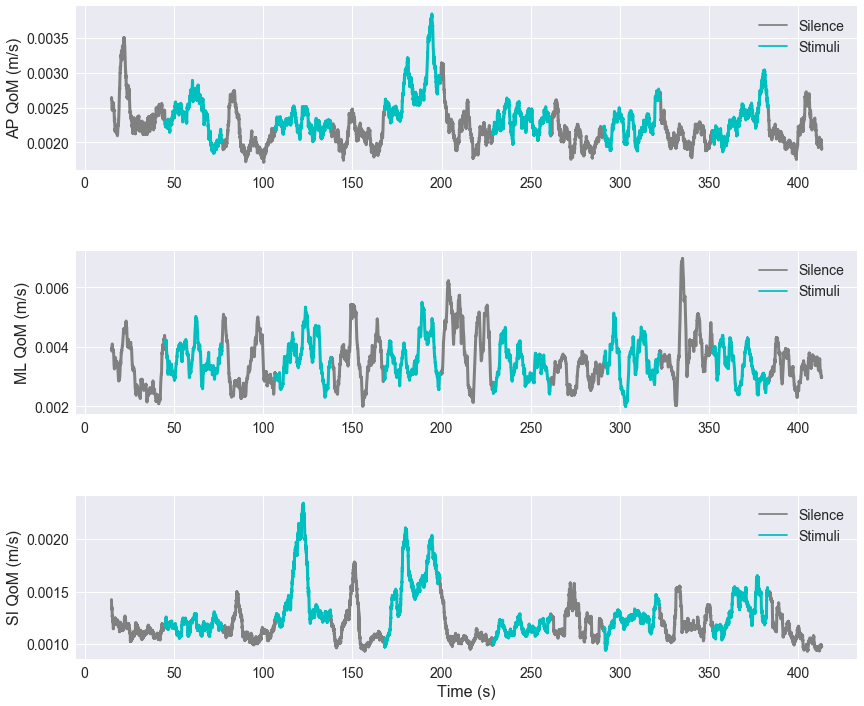

In [119]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}


axX = plt.subplot(3, 1, 1)
#axX.set_facecolor("white")
for i in range(0,7,1):
  axX.plot(QoMX_smooth_segmented_sil[10][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axX.plot(QoMX_smooth_segmented_mus[10][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (m/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
#axZ.set_facecolor("white")
for i in range(0,7,1):
  axZ.plot(QoMZ_smooth_segmented_sil[10][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axZ.plot(QoMZ_smooth_segmented_mus[10][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (m/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
#axY.set_facecolor("white")
for i in range(0,7,1):
  axY.plot(QoMY_smooth_segmented_sil[10][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axY.plot(QoMY_smooth_segmented_mus[10][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (m/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


plt.subplots_adjust(hspace=0.5)



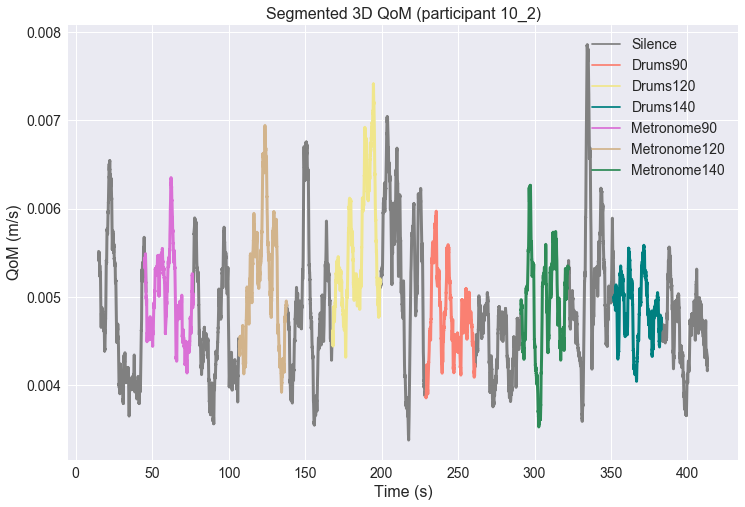

In [120]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
#ax8.set_facecolor("white")
for i in range(0,7,1):
  ax8.plot(QoM_smooth_segmented_sil[10][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_sort_mus[10][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[10][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[10][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[10][4][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[10][5][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[10][6][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Drums90", color='salmon')
plt.plot([], label="Drums120", color='khaki')
plt.plot([], label="Drums140", color='teal')
plt.plot([], label="Metronome90", color='orchid')
plt.plot([], label="Metronome120", color='tan')
plt.plot([], label="Metronome140", color='seagreen')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (m/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 10_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

## Visualizing the stimuli

In [116]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files

y1, sr1 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/DRUMS90bpm.wav')
y2, sr2 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/DRUMS120bpm.wav')
y3, sr3 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/DRUMS140bpm.wav')
y4, sr4 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/METRONOME90bpm.wav')
y5, sr5 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/METRONOME120bpm.wav')
y6, sr6 = librosa.load('drive/My Drive/UiO RITMO/2019 NM/METRONOME140bpm.wav')

fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[12:15,0:2])
librosa.display.waveplot(y4, sr=sr4, color='orchid')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:15,2:4])
plt.title('Sound Stimuli waveforms', fontsize=16)
librosa.display.waveplot(y5, sr=sr5, color='tan')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[12:15,4:6])
librosa.display.waveplot(y6, sr=sr6, color='seagreen')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[16:19,0:2])
librosa.display.waveplot(y1, sr=sr1, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[16:19,2:4])
librosa.display.waveplot(y2, sr=sr2, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[16:19,4:6])
librosa.display.waveplot(y3, sr=sr3, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


ax8 = plt.subplot(grid[0:10,0:6])

for i in range(0,7,1):
  ax8.plot(QoMX_smooth_segmented_sil[5][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoMX_smooth_segmented_sort_mus[5][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][4][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][5][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][6][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli

plt.plot([], label="Silence", color='gray')


plt.plot([], label="Isochronous 90BPM", color='orchid')
plt.plot([], label="Isochronous 120BPM", color='tan')
plt.plot([], label="Isochronous 140BPM", color='seagreen')

plt.plot([], label=" ", color='white')

plt.plot([], label="Complex 90BPM", color='salmon')
plt.plot([], label="Complex 120BPM", color='khaki')
plt.plot([], label="Complex 140BPM", color='teal')


plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (m/s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

#plt.title('Segmented AP QoM (participant 5_2)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)
plt.legend(loc='upper left', fontsize=14, ncol=2)
plt.tight_layout()
fig.savefig("segmentsqom_stimuli.pdf", bbox_inches='tight')


NameError: name 'librosa' is not defined

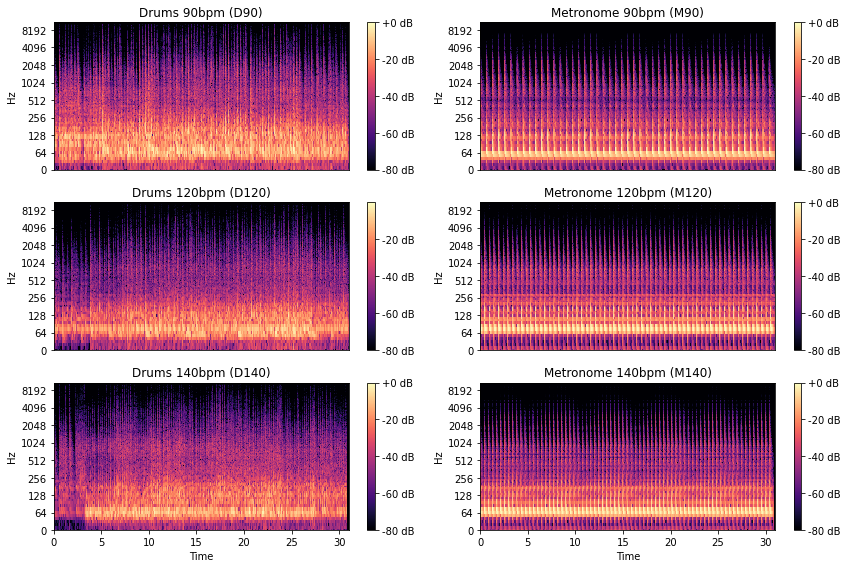

In [ ]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)
D4 = librosa.amplitude_to_db(np.abs(librosa.stft(y4)), ref=np.max)
D5 = librosa.amplitude_to_db(np.abs(librosa.stft(y5)), ref=np.max)
D6 = librosa.amplitude_to_db(np.abs(librosa.stft(y6)), ref=np.max)

fig = plt.figure(figsize=(12,8))

plt.subplot(3, 2, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Drums 90bpm (D90)')

plt.subplot(3, 2, 3)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Drums 120bpm (D120)')

plt.subplot(3, 2, 5)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Drums 140bpm (D140)')

plt.subplot(3, 2, 2)
librosa.display.specshow(D4, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Metronome 90bpm (M90)')

plt.subplot(3, 2, 4)
librosa.display.specshow(D5, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Metronome 120bpm (M120)')

plt.subplot(3, 2, 6)
librosa.display.specshow(D6, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Metronome 140bpm (M140)')

plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
